In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
Student_Marks = pd.read_csv("Student_Marks.csv")
df = Student_Marks.copy()
df.head(5)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.shape

(100, 3)

In [6]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_courses,100.0,5.29000,1.799523,3.000,4.0000,5.0000,7.00000,8.000
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.0220,6.17925,7.957
Marks,100.0,24.41769,14.326199,5.609,12.6330,20.0595,36.67625,55.299


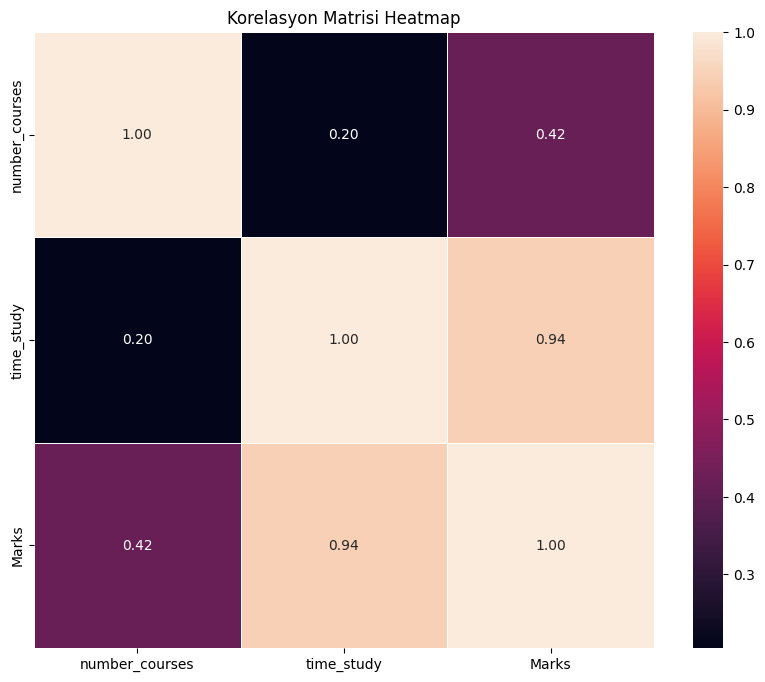

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi Heatmap')
plt.show()

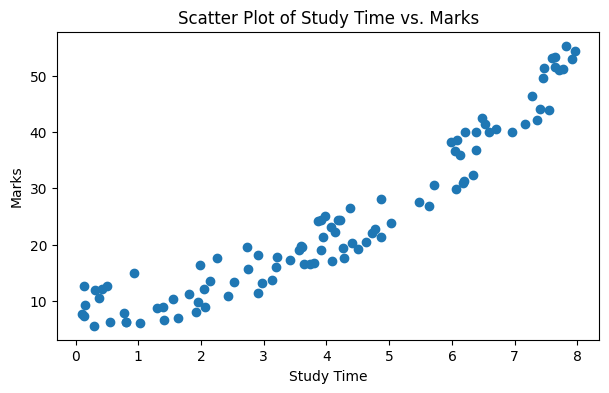

In [9]:
plt.scatter(df['time_study'], df['Marks'])
plt.xlabel('Study Time')
plt.ylabel('Marks')
plt.title('Scatter Plot of Study Time vs. Marks')
plt.show()


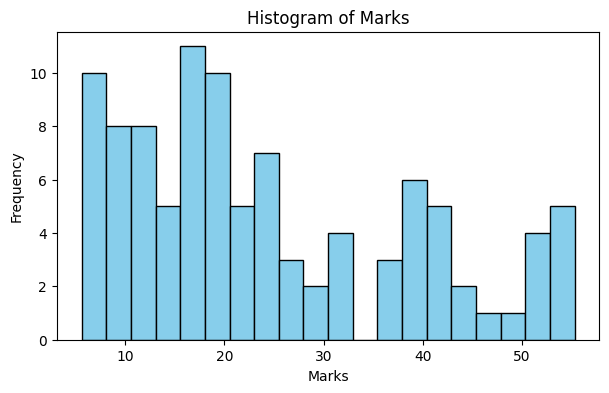

In [10]:
plt.hist(df['Marks'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Histogram of Marks')
plt.show()


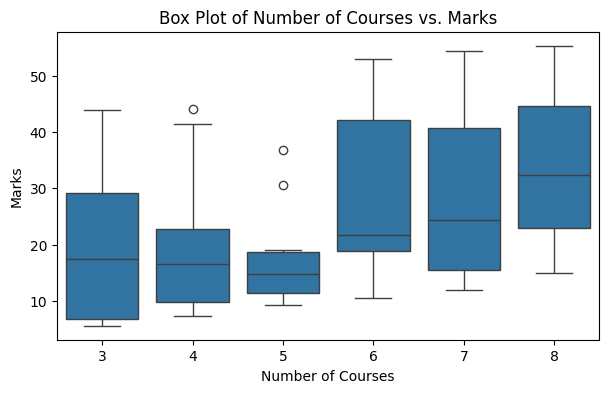

In [11]:
sns.boxplot(x='number_courses', y='Marks', data=df)
plt.xlabel('Number of Courses')
plt.ylabel('Marks')
plt.title('Box Plot of Number of Courses vs. Marks')
plt.show()


## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [13]:
y = df["Marks"]
X = df[["number_courses", "time_study"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

In [16]:
model.coef_

array([1.90391457, 5.29013558])

In [17]:
model.intercept_

-7.2297781014350875

In [18]:
model.score(X_train,y_train)

0.939179717649203

## Predicting Test Data

In [19]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

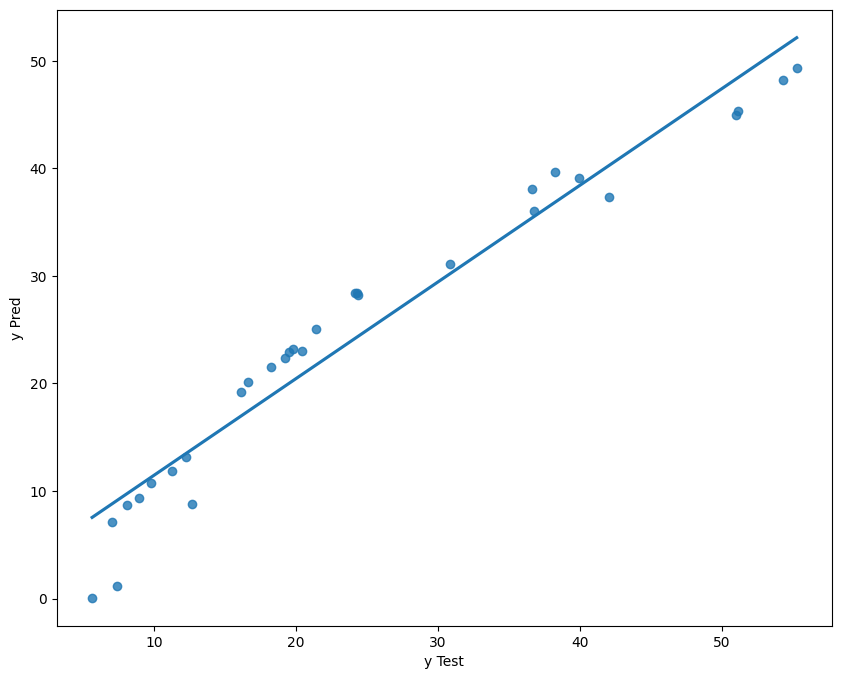

In [20]:
plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=y_pred, ci=None,)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()


## Evaluating the Model


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# tüm regression metriclerimizi birarada görmek için yukarıdaki fonksiyonu tanımlıyoruz.

slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 

,s_linear_train,s_linear_test
R2,0.939180,0.941754
mae,3.035388,3.028474
mse,11.785027,13.104475
rmse,3.432933,3.620010


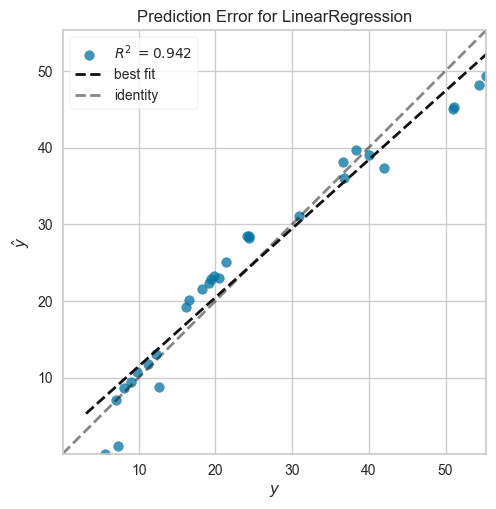

In [22]:
from yellowbrick.regressor import PredictionError
model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)    
visualizer.score(X_test, y_test)  
visualizer.show(); 

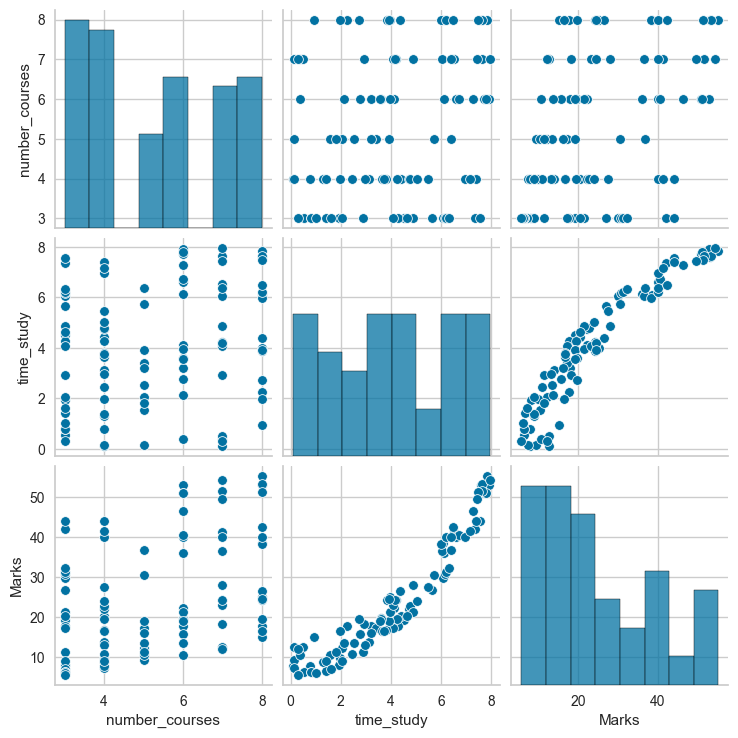

In [23]:
sns.pairplot(df)
plt.show()

## Polynomial Conversion

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
X = df.drop("Marks", axis=1)
y = df.Marks

In [26]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [27]:
poly_features = poly_conv.transform(X)   # polymomial feature lar urettik
poly_features

array([[3.0000000e+00, 4.5080000e+00, 9.0000000e+00, 1.3524000e+01,
        2.0322064e+01],
       [4.0000000e+00, 9.6000000e-02, 1.6000000e+01, 3.8400000e-01,
        9.2160000e-03],
       [4.0000000e+00, 3.1330000e+00, 1.6000000e+01, 1.2532000e+01,
        9.8156890e+00],
       [6.0000000e+00, 7.9090000e+00, 3.6000000e+01, 4.7454000e+01,
        6.2552281e+01],
       [8.0000000e+00, 7.8110000e+00, 6.4000000e+01, 6.2488000e+01,
        6.1011721e+01],
       [6.0000000e+00, 3.2110000e+00, 3.6000000e+01, 1.9266000e+01,
        1.0310521e+01],
       [3.0000000e+00, 6.0630000e+00, 9.0000000e+00, 1.8189000e+01,
        3.6759969e+01],
       [5.0000000e+00, 3.4130000e+00, 2.5000000e+01, 1.7065000e+01,
        1.1648569e+01],
       [4.0000000e+00, 4.4100000e+00, 1.6000000e+01, 1.7640000e+01,
        1.9448100e+01],
       [3.0000000e+00, 6.1730000e+00, 9.0000000e+00, 1.8519000e+01,
        3.8105929e+01],
       [3.0000000e+00, 7.3530000e+00, 9.0000000e+00, 2.2059000e+01,
        5.40

In [28]:
poly_features.shape     # satır saysıı 200 kaldı, feature 3'ten 9' a çıkarıldı


(100, 5)

## Train | Test Split


In [29]:
    from sklearn.model_selection  import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


In [30]:
from sklearn.linear_model import LinearRegression
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model_poly.predict(X_test)
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
16,30.548,31.029411,-0.481411
1,7.734,7.348256,0.385744
43,10.429,10.693295,-0.264295
67,6.185,5.832392,0.352608
89,40.024,39.719600,0.304400
21,35.939,35.954072,-0.015072
97,41.444,41.771887,-0.327887
51,22.184,22.219703,-0.035703
6,29.889,30.286274,-0.397274
41,15.725,15.851614,-0.126614


In [34]:
def regression_metrics(y_train, y_train_pred, y_test, y_pred, model_name):
    scores = {
        f"{model_name}_train": {
            "R2": r2_score(y_train, y_train_pred),
            "MAE": mean_absolute_error(y_train, y_train_pred),
            "MSE": mean_squared_error(y_train, y_train_pred),
            "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        f"{model_name}_test": {
            "R2": r2_score(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
        }
    }
    return pd.DataFrame(scores)
model_metrics = regression_metrics(y_train, y_train_pred, y_test, y_pred, "polynomial")
model_metrics

,polynomial_train,polynomial_test
R2,-0.927591,0.999644
MAE,14.832082,0.249066
MSE,354.520768,0.086653
RMSE,18.828722,0.294368
